In [1]:
!pip install yellowbrick
!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform
from yellowbrick.regressor import ResidualsPlot
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.svm import SVR
#from google.colab import drive


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
#drive.mount('/content/drive')

In [3]:
#data= pd.read_excel("/content/drive/My Dr./Flight_Fare.xlsx")

In [4]:
data= pd.read_excel("./Flight_Fare.xlsx")

# Exploratory Data Analysis

In [5]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [13]:
data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [14]:
data['Source'].value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [15]:
data['Destination'].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [16]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [17]:
data[data['Airline'] == 'Jet Airways Business']['Additional_Info'].value_counts()

Additional_Info
No info           3
Business class    3
Name: count, dtype: int64

In [18]:
data.loc[data['Airline'] == "Multiple carriers Premium economy", 'Additional_Info'].value_counts()

Additional_Info
No info    13
Name: count, dtype: int64

In [19]:
data.loc[data['Airline'] == 'Vistara Premium economy', 'Additional_Info'].value_counts()

Additional_Info
No info    3
Name: count, dtype: int64

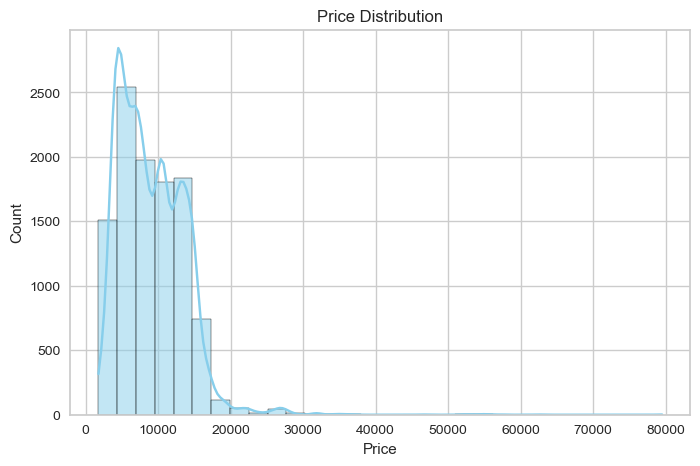

In [20]:
# Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Price'], bins=30, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.show()

In [21]:
contineous_features = ["Duration"]
discrete_features = []
ordinal_features = ["Dep_Time", "Arrival_Time", "Total_Stops", "Date_of_Journey"]
nominal_features = ["Airline", "Source", "Destination", "Route", "Additional_Info"]

# Preprocessing

## Remove Redundant Columns

In [22]:
# Route not needed since it's captured in Total_Stops and Arrival and Departure features
# Remove Arrival_Time as this is capture from Departure Time and Duration
data.drop(["Route", "Arrival_Time"], axis=1, inplace=True)
ordinal_features.remove("Arrival_Time")
nominal_features.remove("Route")

## Data with duplicate values because of casing

In [23]:
categorical_columns = ["Airline", "Source", "Destination", "Total_Stops", "Additional_Info"]
for col in categorical_columns:
    data[col] = data[col].str.lower().str.strip()

## Change Duplicate Records to the same

In [24]:
data.loc[data['Airline'] == 'jet airways business', 'Additional_Info'] = 'business class'
data.loc[data['Airline'] == 'jet airways business', 'Airline'] = 'jet airways'
data.loc[data['Airline'] == "multiple carriers premium economy", 'Additional_Info'] = 'premium economy class'
data.loc[data['Airline'] == "multiple carriers premium economy", 'Airline'] = 'multiple carriers'
data.loc[data['Airline'] == 'vistara premium economy', 'Additional_Info'] = 'premium economy class'
data.loc[data['Airline'] == 'vistara premium economy', 'Airline'] = 'vistara'
data.loc[data['Destination'] == 'new delhi', 'Destination'] = 'delhi'

## Impute Missing Values

In [25]:
data['Total_Stops'] = data['Total_Stops'].fillna(data['Total_Stops'].mode()[0])

## Encode Ordinal Data

In [26]:
encoder = OrdinalEncoder(categories=[["non-stop", "1 stop", "2 stops", "3 stops", "4 stops"]])
data['Total_Stops'] = encoder.fit_transform(data[['Total_Stops']])
data['Total_Stops'] = data['Total_Stops'].astype(int)

## Date Conversion

In [27]:
def extract_duration(duration_str):
    """Extracts hours and minutes from a duration string.

    Args:
        duration_str: The duration string in the format "HHh MMm" or "HHh" or "MMm".

    Returns:
        A tuple containing the number of hours and minutes.
    """
    hours = 0
    minutes = 0
    if 'h' in duration_str:
        hours_str, rest = duration_str.split('h')
        hours = int(hours_str)
    if 'm' in duration_str:
        if 'h' in duration_str:
            minutes_str = rest.strip('m')
        else:
            minutes_str = duration_str.strip('m')
        minutes = int(minutes_str)
    return hours, minutes

In [28]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')
# Extract day, month, year
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month
data['Journey_year'] = data['Date_of_Journey'].dt.year

ordinal_features.extend(["Journey_day", "Journey_month", "Journey_year"])

# Extract day of the week
data['Journey_day_of_week'] = data['Date_of_Journey'].dt.day_name()
nominal_features.extend(['Journey_day_of_week'])

data['Dep_Time'] = pd.to_datetime(data['Dep_Time'], format='%H:%M')

# Extract hour and minute from 'Dep_Time'
data['Dep_hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min'] = pd.to_datetime(data['Dep_Time']).dt.minute
ordinal_features.extend(['Dep_hour', 'Dep_min'])

# Extract hours and minutes from 'Duration'
data['Duration_hours'], data['Duration_mins'] = zip(*data['Duration'].apply(extract_duration))

# Convert 'Duration_hours' and 'Duration_mins' to numeric
data['Duration_hours'] = data['Duration_hours'].astype(int)
data['Duration_mins'] = data['Duration_mins'].astype(int)
contineous_features.extend(['Duration_hours', 'Duration_mins'])

# Calculate total duration in minutes
data['Duration_total_mins'] = data['Duration_hours'] * 60 + data['Duration_mins']
contineous_features.extend(['Duration_total_mins'])

# Drop original columns
data.drop(['Date_of_Journey', 'Dep_Time', 'Duration', 'Duration_hours', 'Duration_mins'], axis=1, inplace=True)
ordinal_features.remove('Date_of_Journey')
ordinal_features.remove("Dep_Time")
contineous_features.remove('Duration')
contineous_features.remove("Duration_hours")
contineous_features.remove('Duration_mins')

### Check the distribution of years

In [29]:
data['Journey_year'].value_counts()

Journey_year
2019    10683
Name: count, dtype: int64

### Check the distribution of Duration of Total Minutes

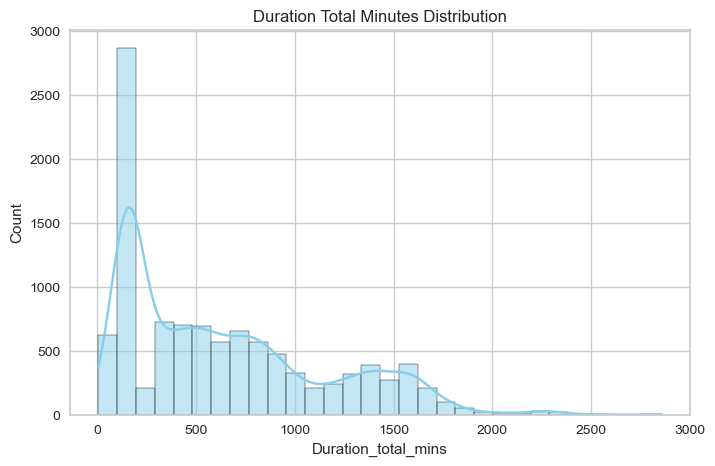

In [30]:
# Duration Total Minutes Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Duration_total_mins'], bins=30, kde=True, color='skyblue')
plt.title('Duration Total Minutes Distribution')
plt.show()

## Encoding

In [31]:
data = pd.get_dummies(data, columns=nominal_features, drop_first=True)

In [32]:
bool_columns = data.select_dtypes(include=["bool"]).columns
data[bool_columns] = data[bool_columns].astype("int")

## Check for Homoscedasticity

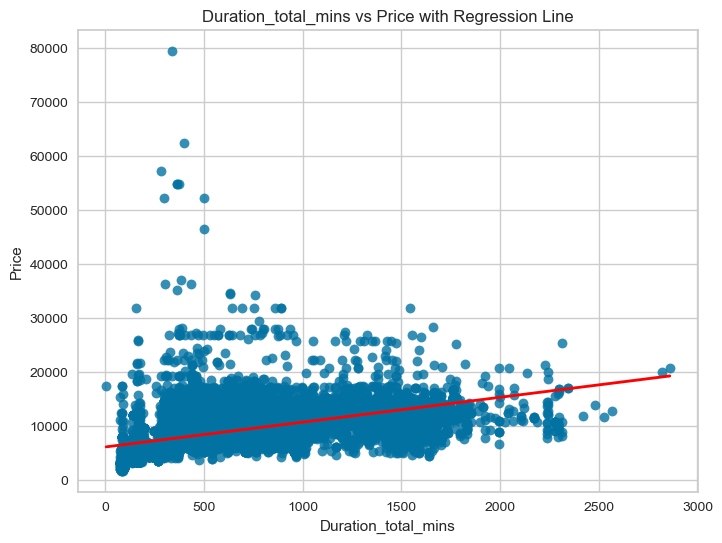

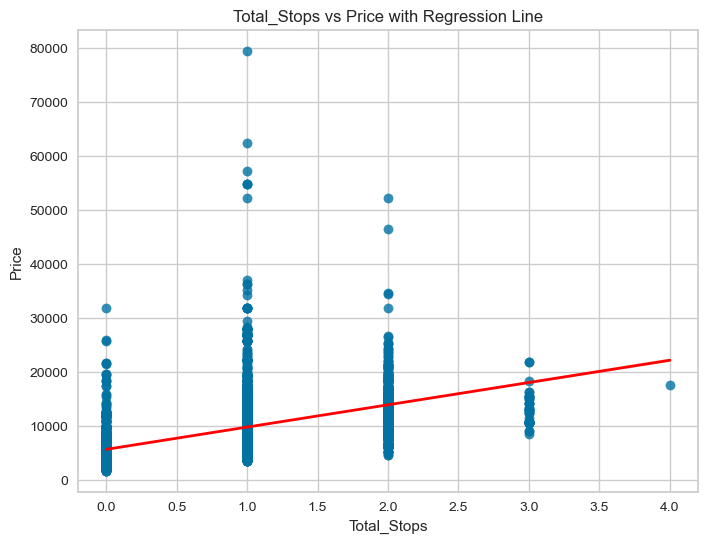

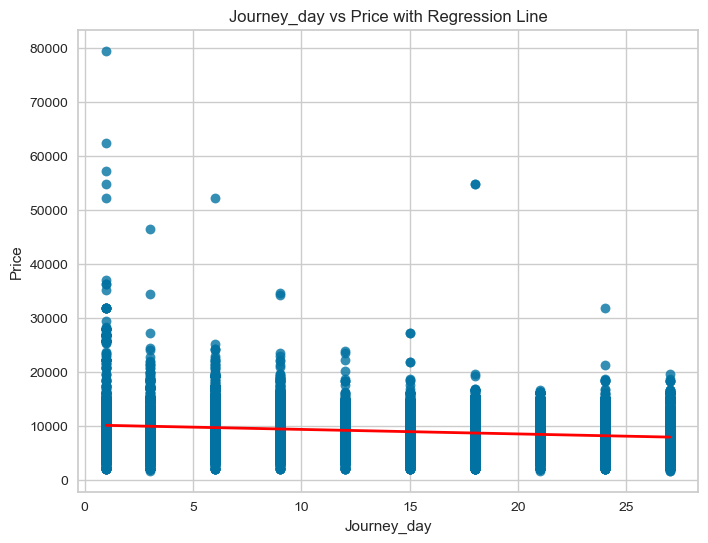

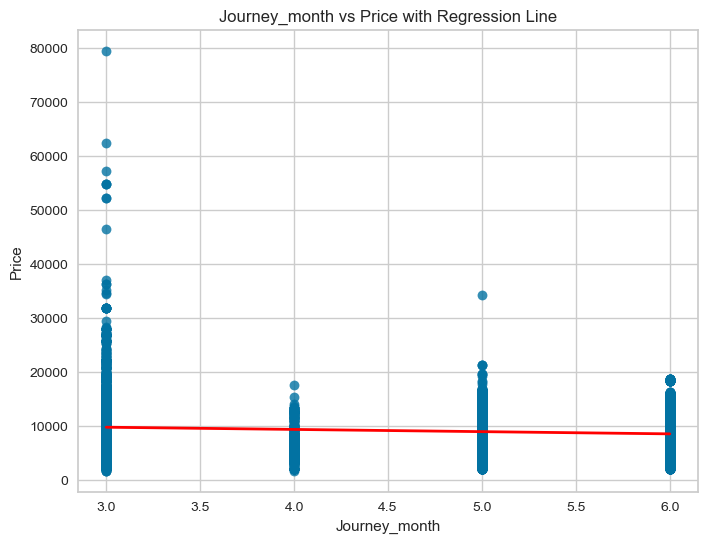

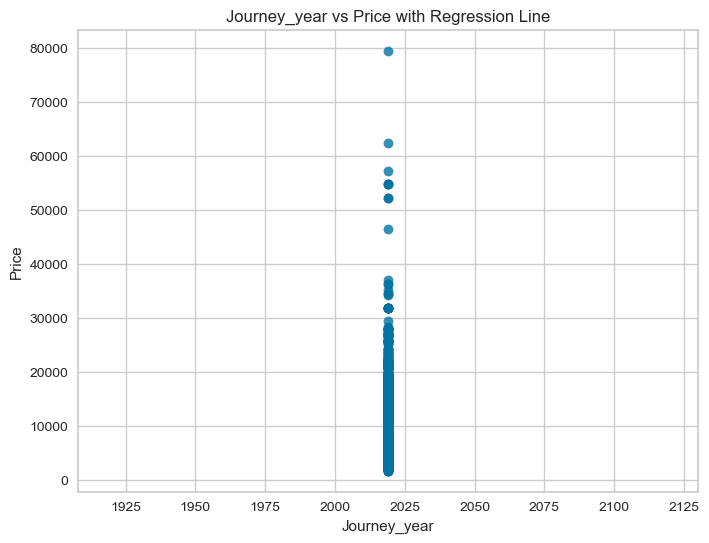

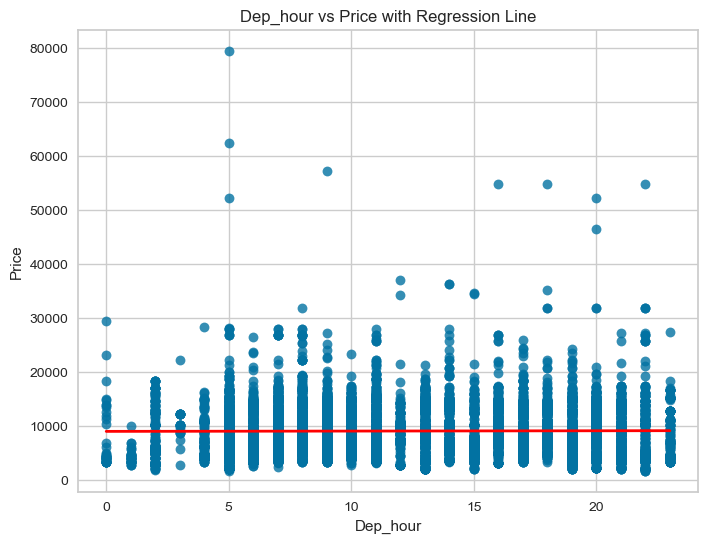

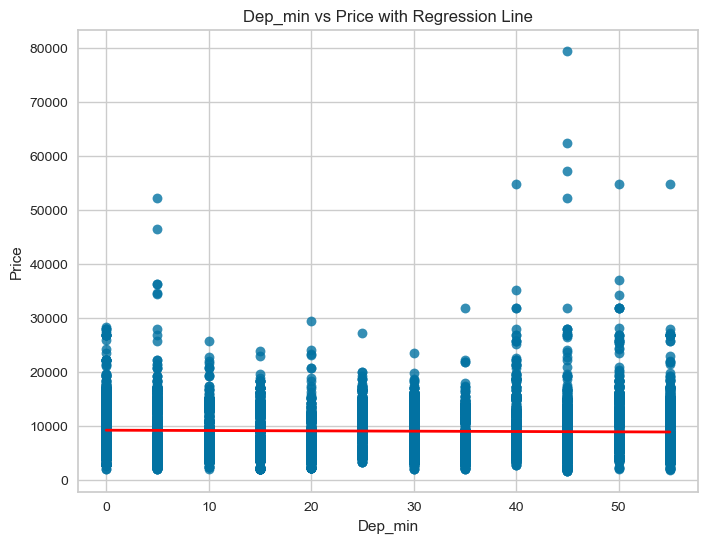

In [33]:
numeric_features = contineous_features + discrete_features + ordinal_features
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=feature, y='Price', data=data, scatter_kws={'s': 50}, line_kws={'color': 'red', 'lw': 2})
    plt.title(f'{feature} vs Price with Regression Line')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

## Normalization and standardization

In [34]:
scaler = RobustScaler()
data['Duration_total_mins'] = scaler.fit_transform(data[['Duration_total_mins']])

In [35]:
selected_features = [feature for feature in ordinal_features if feature != "total_stops"]
ordinalEncoder = OrdinalEncoder()
standardScalar = StandardScaler()
data[selected_features] = ordinalEncoder.fit_transform(data[selected_features])
data[selected_features] = standardScalar.fit_transform(data[selected_features])

## Feature Engineering

In [36]:
X = data.drop("Price", axis=1)
Y  = data["Price"]
x = sm.add_constant(X)
est = sm.OLS(Y, x).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     714.7
Date:                Thu, 09 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:06:54   Log-Likelihood:                -99045.
No. Observations:               10683   AIC:                         1.982e+05
Df Residuals:                   10649   BIC:                         1.984e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

# Model Evaluation

## Random Forest Regressor

In [60]:
X = data.drop(columns=['Price'])
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kfold = KFold(n_splits=20, shuffle=True, random_state=42)

### Training

In [61]:
# Define the parameter distribution for Random Forest Regressor
pca = PCA()
param_dist = {
    'pca__n_components': [None, 0.10, 0.20, 0.30, 0.40],  # PCA number of components to test (None for no reduction)
    'rf__n_estimators': randint(300, 1000),  # Use a higher number of trees
    'rf__max_features': ['sqrt', 'log2'],  # Limit the number of features to consider
    'rf__max_depth': randint(2, 20),  # Reduce max depth
    'rf__min_samples_split': randint(2, 30),  # More samples to split
    'rf__min_samples_leaf': randint(6, 40),  # More samples per leaf
    'rf__bootstrap': [True, False]  # Use bootstrap sampling
}

# Initialize Random Forest Regressor (without specifying hyperparameters)
rf = RandomForestRegressor(random_state=42)
pipeline = Pipeline([
    ('pca', pca),  # Apply PCA for dimensionality reduction
    ('rf', rf)  # Apply Random Forest Regressor
])

# Initialize RandomizedSearchCV with the parameter distribution
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=100,  # Number of different hyperparameter combinations to sample
    cv=kfold,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Use MSE as the scoring metric
    verbose=2,
    random_state=42,  # Fix random seed for reproducibility
    n_jobs=-1  # Use all cores for faster computation
)

# Train the model using RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best model from the random search
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Param: ", best_params)
print("Best Score: ", best_score)

Fitting 20 folds for each of 100 candidates, totalling 2000 fits
[CV] END pca__n_components=0.1, rf__bootstrap=True, rf__max_depth=9, rf__max_features=log2, rf__min_samples_leaf=29, rf__min_samples_split=19, rf__n_estimators=587; total time=   8.5s
[CV] END pca__n_components=0.1, rf__bootstrap=True, rf__max_depth=9, rf__max_features=log2, rf__min_samples_leaf=29, rf__min_samples_split=19, rf__n_estimators=587; total time=   8.1s
[CV] END pca__n_components=0.1, rf__bootstrap=True, rf__max_depth=11, rf__max_features=log2, rf__min_samples_leaf=31, rf__min_samples_split=18, rf__n_estimators=403; total time=   6.0s
[CV] END pca__n_components=0.1, rf__bootstrap=True, rf__max_depth=11, rf__max_features=log2, rf__min_samples_leaf=31, rf__min_samples_split=18, rf__n_estimators=403; total time=   5.6s
[CV] END pca__n_components=None, rf__bootstrap=True, rf__max_depth=12, rf__max_features=log2, rf__min_samples_leaf=34, rf__min_samples_split=11, rf__n_estimators=837; total time=  36.7s
[CV] END pc

### Prediction

In [62]:
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Model Performance
print("\nRandom Forest Model Performance (RandomizedSearchCV):")
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print(f"R-Squared Value: {r2:.2f}")


Random Forest Model Performance (RandomizedSearchCV):
Mean Squared Error:  3843351.894460982
Root Mean Squared Error:  1960.4468609123232
R-Squared Value: 0.82


### Visuals

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


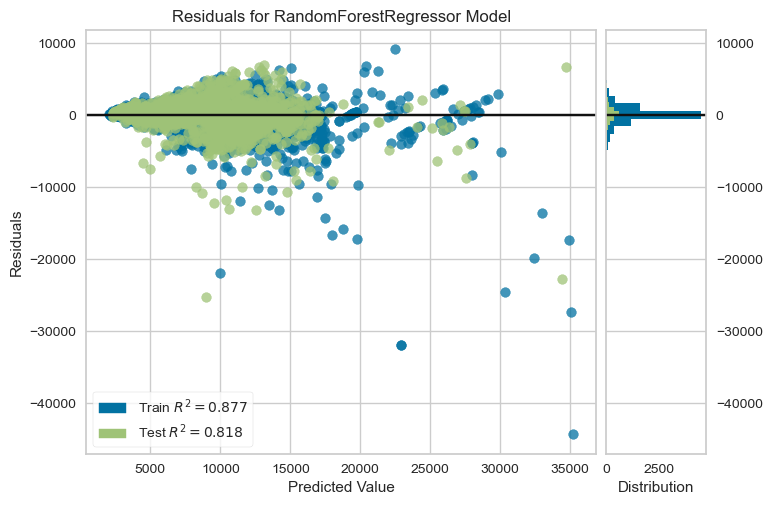

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [64]:
visualizer = ResidualsPlot(best_model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the plot

## SVC Regressor

In [65]:
X = data.drop(columns=['Price'])
y = data['Price']
Y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

### Training

In [66]:
# Define the SVR model
svr = SVR()
pca = PCA()
# Define the parameter grid for SVR
param_grid = {
   'pca__n_components': [0.9, 0.95], 
    'svr__C': [1.0, 10.0],
    'svr__epsilon': [0.1, 0.5],
    'svr__kernel': ['linear', 'rbf'],
    'svr__gamma': ['scale']
}

pipeline = Pipeline([
    ('pca', pca),  # Apply PCA for dimensionality reduction
    ('svr', svr)  # Apply Random Forest Regressor
])


grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=kfold,  # 10-fold cross-validation
    scoring='neg_mean_squared_error',  # Use MSE as the metric
    verbose=1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best neg_mean_squared_error: ", best_score)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best Parameters:  {'pca__n_components': 0.95, 'svr__C': 10.0, 'svr__epsilon': 0.1, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
Best neg_mean_squared_error:  -0.027143976909995964


## Predict

In [67]:
# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
rmse = np.expm1(rmse)
r2 = r2_score(y_test, y_pred)
# Model Performance
print("\nSVR Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared Value: {r2:.2f}")


SVR Performance:
Mean Squared Error: 0.03
Root Mean Squared Error (RMSE): 0.18
R-Squared Value: 0.90


### Visualization

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


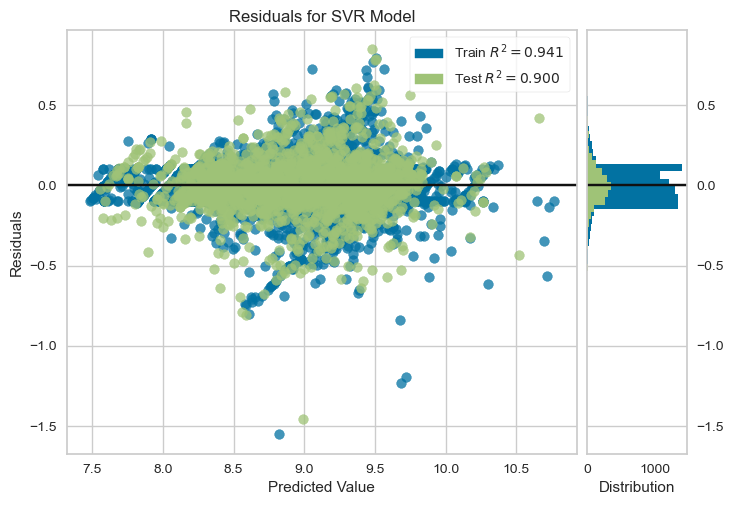

<Axes: title={'center': 'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [68]:
visualizer = ResidualsPlot(best_model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## XgBoost

In [69]:
X = data.drop(columns=['Price'])
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

### Training

In [70]:
xgb = XGBRegressor()
pca = PCA()
param_grid = {
    'pca__n_components': [None, 0.95, 0.99],  # PCA number of components to test (None for no reduction)
    'xgb__max_depth': range(3, 7),
    'xgb__min_child_weight': [3, 6, 10],  # Minimum leaf size
    'xgb__gamma': [i / 10.0 for i in range(2, 6)],  # Minimum loss reduction
    'xgb__subsample': [0.6, 0.7, 0.8, 0.9],  # Random sampling of rows
    'xgb__colsample_bytree': [0.4, 0.6, 0.8, 0.9],  # Random sampling of features
    'xgb__reg_alpha': [0.1, 1, 10, 50],  # L1 regularization
    'xgb__reg_lambda': [0.1, 1, 10, 50],  # L2 regularization
    'xgb__learning_rate': [0.005, 0.01, 0.02],  # Adjust learning rate
    'xgb__n_estimators': [1000, 1500],  # Number of boosting rounds
}

pipeline = Pipeline([
    ('pca', pca),  # Apply PCA for dimensionality reduction
    ('xgb', xgb)  # Apply Random Forest Regressor
])

random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid,
                                   n_iter=200, scoring='neg_mean_squared_error',
                                   cv=kfold, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_model = random_search.best_estimator_
best_score = random_search.best_score_
print("Best param: ", best_params)
print("Best Score: ", best_score)


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best param:  {'xgb__subsample': 0.7, 'xgb__reg_lambda': 10, 'xgb__reg_alpha': 50, 'xgb__n_estimators': 1500, 'xgb__min_child_weight': 10, 'xgb__max_depth': 6, 'xgb__learning_rate': 0.02, 'xgb__gamma': 0.3, 'xgb__colsample_bytree': 0.9, 'pca__n_components': None}
Best Score:  -3457968.6801891266


### Prediction

In [71]:
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Model Performance
print("\nXGBoost Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared Value: {r2:.2f}")


XGBoost Performance:
Mean Squared Error: 3437708.34
Root Mean Squared Error (RMSE): 1854.11
R-Squared Value: 0.84


### Visualization

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


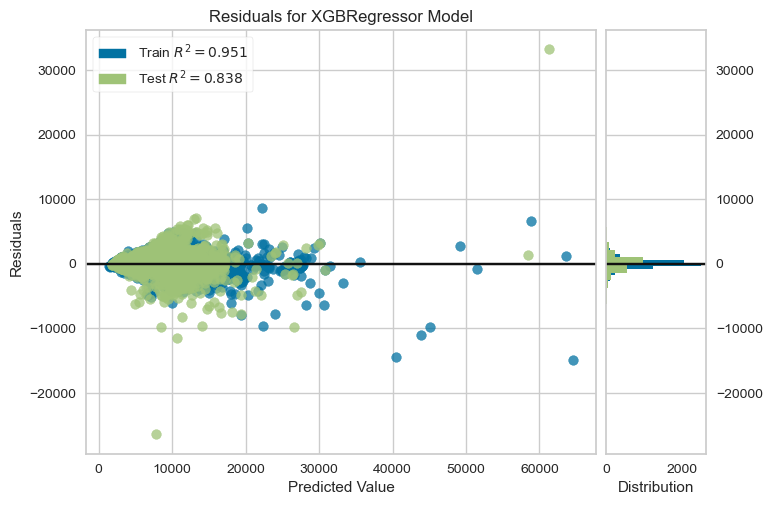

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [72]:
visualizer = ResidualsPlot(best_model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the plot